In [201]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import re
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import malaya
from langdetect import detect
from wordcloud import WordCloud

In [202]:
# tweets details
aw_td = pd.read_excel('anwar_twitter_info_ds.xlsx','tweets_details')
# replies details
aw_rd = pd.read_excel('anwar_twitter_info_ds.xlsx','replies_details')

In [203]:
aw_td

,Tweet ID,Tweet Text,Date,Likes Count,Retweet Count,Hashtag/s,Sentiment,Engagement Rate
0,1658423912026500096,Saya turut mengulangi kenyataannya bahawa nega...,2023-05-16 10:47:27+00:00,63,16,NaN,Neutral,0.004362
1,1658423904388679936,"Justeru, sumbangan anggota keselamatanÂ termas...",2023-05-16 10:47:25+00:00,61,16,NaN,Neutral,0.004252
2,1658423897413530112,Saya tegaskan tugas anggota keselamatan dalam ...,2023-05-16 10:47:23+00:00,48,15,NaN,Neutral,0.003479
3,1658423890077700096,Hadir sama Ketua Menteri Melaka Datuk Seri Ab ...,2023-05-16 10:47:22+00:00,48,16,NaN,Neutral,0.003534
4,1658423881835889920,Menghadiri Sambutan Aidilfitri Perpaduan MADAN...,2023-05-16 10:47:20+00:00,540,99,NaN,Neutral,0.035286
...,...,...,...,...,...,...,...,...
195,1653931740464019968,Hari Wesak adalah hari besar buat sahabat-saha...,2023-05-04 01:17:10+00:00,1067,165,NaN,Neutral,0.068032
196,1653648017130680064,Kerajaan Perpaduan mengulangi komitmen dan tek...,2023-05-03 06:29:45+00:00,720,198,NaN,Neutral,0.050693
197,1653356488793139968,Moga lawatan ini mengeratkan hubungan selain m...,2023-05-02 11:11:19+00:00,134,24,NaN,Neutral,0.008725
198,1653356483483140096,"Ketika itu, beliau bertugas sebagai Setiausaha...",2023-05-02 11:11:18+00:00,138,23,NaN,Positive,0.008891


In [204]:
aw_rd

,Tweet ID,Username,Tweet Text,Created Dated,Like Count,Retweet Count,Sentiment,Sentiment Score
0,1658638258564389888,kamal_ganesan,@anwaribrahim @saifnasution DSAI modes operand...,2023-05-17 00:59:11+00:00,0,0,Neutral,0.000000
1,1658633136240999936,abuhanifahsadan,@anwaribrahim ðŸ˜…ðŸ¤£ðŸ˜ðŸ˜‚ðŸ¤£ðŸ¤£,2023-05-17 00:38:50+00:00,0,0,Neutral,0.000000
2,1658629377415059968,shazrul_wan,@anwaribrahim @DrZalihaMustafa @radzi_dr @rafi...,2023-05-17 00:23:54+00:00,0,1,Neutral,0.000000
3,1658626510377600000,nurfarahinabd13,@anwaribrahim ðŸ‘ðŸ‘ðŸ‘ðŸ‘,2023-05-17 00:12:30+00:00,0,0,Neutral,0.000000
4,1658626458707960064,nurfarahinabd13,@anwaribrahim Mantap PMX..,2023-05-17 00:12:18+00:00,0,0,Neutral,0.000000
...,...,...,...,...,...,...,...,...
725,1656859646320320000,SriDamai210561,"@anwaribrahim \nYAB PMX, for your information ...",2023-05-12 03:11:37+00:00,0,0,Neutral,0.000000
726,1656859392350789888,Bersama881,@anwaribrahim How can someone delay a court he...,2023-05-12 03:10:36+00:00,0,0,Negative,-0.089286
727,1656858810324229888,Bersama881,@anwaribrahim You claim to be fixing corruptio...,2023-05-12 03:08:17+00:00,0,0,Negative,-0.500000
728,1656858364360689920,Bersama881,@anwaribrahim Isnâ€™t it a bit pathetic that c...,2023-05-12 03:06:31+00:00,1,0,Negative,-0.750000


In [205]:
aw_rd.rename(columns={'Created Dated': 'Date'}, inplace=True)

## Data Cleaning and Preprocessing

In [206]:
aw_td.describe().map(lambda x: f"{x:.6f}").T

,count,mean,std,min,25%,50%,75%,max
Tweet ID,200.000000,1656465422930682112.000000,1320757055842344.000000,1653356478131219968.000000,1655400603186777600.000000,1656613904850765056.000000,1657581635655827456.000000,1658423912026500096.000000
Likes Count,200.000000,682.135000,2984.936266,0.000000,87.000000,128.000000,540.000000,40362.000000
Retweet Count,200.000000,185.815000,1264.087901,9.000000,19.000000,24.500000,102.000000,17720.000000
Engagement Rate,200.000000,0.047929,0.233922,0.002706,0.005840,0.008421,0.033312,3.207340


In [207]:
aw_rd.describe().map(lambda x: f"{x:.6f}").T

,count,mean,std,min,25%,50%,75%,max
Tweet ID,730.000000,1657703486283509760.000000,496601223233302.125000,1656857688964470016.000000,1657233411175755008.000000,1657733674725690112.000000,1658097923911205120.000000,1658638258564389888.000000
Like Count,730.000000,2.552055,9.734509,0.000000,0.000000,0.000000,1.000000,139.000000
Retweet Count,730.000000,0.210959,0.885419,0.000000,0.000000,0.000000,0.000000,11.000000
Sentiment Score,730.000000,0.035385,0.171541,-0.750000,0.000000,0.000000,0.000000,1.000000


- Cleaning unnecessary element from the text and convert to lower case

In [208]:
def clean_tweet(tweet):

    tweet = re.sub(r'http\S+', '', tweet) # Remove URLs
    tweet = re.sub(r'@\w+', '', tweet) # Remove mentions
    tweet = re.sub(r'#', '', tweet)  # Remove hashtag symbol but keep the word
    tweet = re.sub(r'[^\w\s]', '', tweet) # Remove punctuation except for underscores (to retain words like email_address)
    tweet = re.sub(r'[^\x00-\x7F]+', '', tweet)  # Keep only ASCII characters, remove garbled Unicode characters (example: 'ðÿ')
    tweet = tweet.lower() # Convert to lowercase
    tweet = tweet.strip() # Trim leading and trailing whitespace
    
    return tweet

aw_td['Tweet Text'] = aw_td['Tweet Text'].apply(clean_tweet)
aw_rd['Tweet Text'] = aw_rd['Tweet Text'].apply(clean_tweet)

In [209]:
aw_rd

,Tweet ID,Username,Tweet Text,Date,Like Count,Retweet Count,Sentiment,Sentiment Score
0,1658638258564389888,kamal_ganesan,dsai modes operandi atok adalah pergi luar neg...,2023-05-17 00:59:11+00:00,0,0,Neutral,0.000000
1,1658633136240999936,abuhanifahsadan,,2023-05-17 00:38:50+00:00,0,0,Neutral,0.000000
2,1658629377415059968,shazrul_wan,kesa,2023-05-17 00:23:54+00:00,0,1,Neutral,0.000000
3,1658626510377600000,nurfarahinabd13,,2023-05-17 00:12:30+00:00,0,0,Neutral,0.000000
4,1658626458707960064,nurfarahinabd13,mantap pmx,2023-05-17 00:12:18+00:00,0,0,Neutral,0.000000
...,...,...,...,...,...,...,...,...
725,1656859646320320000,SriDamai210561,yab pmx for your information there is another ...,2023-05-12 03:11:37+00:00,0,0,Neutral,0.000000
726,1656859392350789888,Bersama881,how can someone delay a court hearing due to d...,2023-05-12 03:10:36+00:00,0,0,Negative,-0.089286
727,1656858810324229888,Bersama881,you claim to be fixing corruption rosmah whos ...,2023-05-12 03:08:17+00:00,0,0,Negative,-0.500000
728,1656858364360689920,Bersama881,isnt it a bit pathetic that corrupt politician...,2023-05-12 03:06:31+00:00,1,0,Negative,-0.750000


- Remove empty string rows (not detected as null values)

In [210]:
aw_rd = aw_rd[aw_rd['Tweet Text'] != '']

In [211]:
aw_rd.head()

,Tweet ID,Username,Tweet Text,Date,Like Count,Retweet Count,Sentiment,Sentiment Score
0,1658638258564389888,kamal_ganesan,dsai modes operandi atok adalah pergi luar neg...,2023-05-17 00:59:11+00:00,0,0,Neutral,0.0
2,1658629377415059968,shazrul_wan,kesa,2023-05-17 00:23:54+00:00,0,1,Neutral,0.0
4,1658626458707960064,nurfarahinabd13,mantap pmx,2023-05-17 00:12:18+00:00,0,0,Neutral,0.0
5,1658626413786970112,nurfarahinabd13,terbaik pm anwar ibrahimsemoga terus kehadapan...,2023-05-17 00:12:07+00:00,0,0,Neutral,0.0
6,1658625075174850048,Ghifarix,who says that this has nothing to do with the ...,2023-05-17 00:06:48+00:00,0,0,Neutral,0.0


In [212]:
aw_rd.reset_index(drop=True, inplace=True)

aw_rd.head()

,Tweet ID,Username,Tweet Text,Date,Like Count,Retweet Count,Sentiment,Sentiment Score
0,1658638258564389888,kamal_ganesan,dsai modes operandi atok adalah pergi luar neg...,2023-05-17 00:59:11+00:00,0,0,Neutral,0.0
1,1658629377415059968,shazrul_wan,kesa,2023-05-17 00:23:54+00:00,0,1,Neutral,0.0
2,1658626458707960064,nurfarahinabd13,mantap pmx,2023-05-17 00:12:18+00:00,0,0,Neutral,0.0
3,1658626413786970112,nurfarahinabd13,terbaik pm anwar ibrahimsemoga terus kehadapan...,2023-05-17 00:12:07+00:00,0,0,Neutral,0.0
4,1658625075174850048,Ghifarix,who says that this has nothing to do with the ...,2023-05-17 00:06:48+00:00,0,0,Neutral,0.0


In [213]:
aw_td.isna().sum()

Tweet ID             0
Tweet Text           0
Date                 0
Likes Count          0
Retweet Count        0
Hashtag/s          194
Sentiment            0
Engagement Rate      0
dtype: int64

Hashtags does not affect the analysis, hence, need not to remove

In [214]:
aw_rd.isna().sum()

Tweet ID           0
Username           0
Tweet Text         0
Date               0
Like Count         0
Retweet Count      0
Sentiment          0
Sentiment Score    0
dtype: int64

- Tokenization

In [215]:
def split_text_into_tokens(text):
    text = text.split(' ')

    return text

aw_td['Tweet Text'] = aw_td['Tweet Text'].apply(split_text_into_tokens)
aw_rd['Tweet Text'] = aw_rd['Tweet Text'].apply(split_text_into_tokens)

In [216]:
aw_td.head()

,Tweet ID,Tweet Text,Date,Likes Count,Retweet Count,Hashtag/s,Sentiment,Engagement Rate
0,1658423912026500096,"[saya, turut, mengulangi, kenyataannya, bahawa...",2023-05-16 10:47:27+00:00,63,16,NaN,Neutral,0.004362
1,1658423904388679936,"[justeru, sumbangan, anggota, keselamatanterma...",2023-05-16 10:47:25+00:00,61,16,NaN,Neutral,0.004252
2,1658423897413530112,"[saya, tegaskan, tugas, anggota, keselamatan, ...",2023-05-16 10:47:23+00:00,48,15,NaN,Neutral,0.003479
3,1658423890077700096,"[hadir, sama, ketua, menteri, melaka, datuk, s...",2023-05-16 10:47:22+00:00,48,16,NaN,Neutral,0.003534
4,1658423881835889920,"[menghadiri, sambutan, aidilfitri, perpaduan, ...",2023-05-16 10:47:20+00:00,540,99,NaN,Neutral,0.035286


In [217]:
aw_rd.head()

,Tweet ID,Username,Tweet Text,Date,Like Count,Retweet Count,Sentiment,Sentiment Score
0,1658638258564389888,kamal_ganesan,"[dsai, modes, operandi, atok, adalah, pergi, l...",2023-05-17 00:59:11+00:00,0,0,Neutral,0.0
1,1658629377415059968,shazrul_wan,[kesa],2023-05-17 00:23:54+00:00,0,1,Neutral,0.0
2,1658626458707960064,nurfarahinabd13,"[mantap, pmx]",2023-05-17 00:12:18+00:00,0,0,Neutral,0.0
3,1658626413786970112,nurfarahinabd13,"[terbaik, pm, anwar, ibrahimsemoga, terus, keh...",2023-05-17 00:12:07+00:00,0,0,Neutral,0.0
4,1658625075174850048,Ghifarix,"[who, says, that, this, has, nothing, to, do, ...",2023-05-17 00:06:48+00:00,0,0,Neutral,0.0


- Count Words

In [218]:
def count_words(text_list):
    count=0
    for word in text_list:
        count+=1
    return count

aw_td['words_count'] = aw_td['Tweet Text'].apply(count_words)
aw_td.insert(loc=2, column='words_count', value=aw_td.pop('words_count'))

aw_rd['words_count'] = aw_rd['Tweet Text'].apply(count_words)
aw_rd.insert(loc=3, column='words_count', value=aw_rd.pop('words_count'))

In [219]:
aw_td.head()

,Tweet ID,Tweet Text,words_count,Date,Likes Count,Retweet Count,Hashtag/s,Sentiment,Engagement Rate
0,1658423912026500096,"[saya, turut, mengulangi, kenyataannya, bahawa...",14,2023-05-16 10:47:27+00:00,63,16,NaN,Neutral,0.004362
1,1658423904388679936,"[justeru, sumbangan, anggota, keselamatanterma...",13,2023-05-16 10:47:25+00:00,61,16,NaN,Neutral,0.004252
2,1658423897413530112,"[saya, tegaskan, tugas, anggota, keselamatan, ...",14,2023-05-16 10:47:23+00:00,48,15,NaN,Neutral,0.003479
3,1658423890077700096,"[hadir, sama, ketua, menteri, melaka, datuk, s...",18,2023-05-16 10:47:22+00:00,48,16,NaN,Neutral,0.003534
4,1658423881835889920,"[menghadiri, sambutan, aidilfitri, perpaduan, ...",13,2023-05-16 10:47:20+00:00,540,99,NaN,Neutral,0.035286


In [220]:
aw_rd.head()

,Tweet ID,Username,Tweet Text,words_count,Date,Like Count,Retweet Count,Sentiment,Sentiment Score
0,1658638258564389888,kamal_ganesan,"[dsai, modes, operandi, atok, adalah, pergi, l...",16,2023-05-17 00:59:11+00:00,0,0,Neutral,0.0
1,1658629377415059968,shazrul_wan,[kesa],1,2023-05-17 00:23:54+00:00,0,1,Neutral,0.0
2,1658626458707960064,nurfarahinabd13,"[mantap, pmx]",2,2023-05-17 00:12:18+00:00,0,0,Neutral,0.0
3,1658626413786970112,nurfarahinabd13,"[terbaik, pm, anwar, ibrahimsemoga, terus, keh...",8,2023-05-17 00:12:07+00:00,0,0,Neutral,0.0
4,1658625075174850048,Ghifarix,"[who, says, that, this, has, nothing, to, do, ...",13,2023-05-17 00:06:48+00:00,0,0,Neutral,0.0


- Removing Stop Words

In [221]:
# Download list of english stopwords using nltk packages

nltk.download('stopwords')
stop_words_english = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [222]:
stop_words_english

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

Malaysian Stopwords: https://www.kaggle.com/datasets/heeraldedhia/stop-words-in-28-languages?select=malaysian.txt

In [223]:
# Loading malaysian stopwords, recieve from kaggle
msia_sw_ds = pd.read_excel('malaysian_stopwords.xlsx',header=None, engine='openpyxl')

msia_sw_ds

,0
0,ada
1,adakah
2,adakan
3,adalah
4,adanya
...,...
314,ya
315,yaini
316,yaitu
317,yakni


In [224]:
# convert msia stopwords ds into set
stop_words_malay = set(msia_sw_ds[0])
stop_words_malay

{'ada',
 'adakah',
 'adakan',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agar',
 'akan',
 'aku',
 'akulah',
 'akupun',
 'al',
 'alangkah',
 'allah',
 'amat',
 'antara',
 'antaramu',
 'antaranya',
 'apa',
 'apa-apa',
 'apabila',
 'apakah',
 'apapun',
 'atas',
 'atasmu',
 'atasnya',
 'atau',
 'ataukah',
 'ataupun',
 'bagaimana',
 'bagaimanakah',
 'bagi',
 'bagimu',
 'baginya',
 'bahawa',
 'bahawasanya',
 'bahkan',
 'bahwa',
 'banyak',
 'banyaknya',
 'barangsiapa',
 'bawah',
 'beberapa',
 'begitu',
 'begitupun',
 'belaka',
 'belum',
 'belumkah',
 'berada',
 'berapa',
 'berikan',
 'beriman',
 'berkenaan',
 'berupa',
 'beserta',
 'biarpun',
 'bila',
 'bilakah',
 'bilamana',
 'bisa',
 'boleh',
 'bukan',
 'bukankah',
 'bukanlah',
 'dahulu',
 'dalam',
 'dalamnya',
 'dan',
 'dapat',
 'dapati',
 'dapatkah',
 'dapatlah',
 'dari',
 'daripada',
 'daripadaku',
 'daripadamu',
 'daripadanya',
 'demi',
 'demikian',
 'demikianlah',
 'dengan',
 'dengannya',
 'di',
 'dia',
 'dialah',
 'didapat',
 'didapa

In [225]:
# removing stop words
def remove_stopwords_from_text(text_list):
    for word in text_list:
        if word in stop_words_english:
            text_list.remove(word)
        elif word in stop_words_malay:
            text_list.remove(word)    
    return text_list

aw_td['Tweet Text'] = aw_td['Tweet Text'].apply(remove_stopwords_from_text)
aw_rd['Tweet Text'] = aw_rd['Tweet Text'].apply(remove_stopwords_from_text)

# count the words again, see the changes
aw_td['words_count'] = aw_td['Tweet Text'].apply(count_words)
aw_rd['words_count'] = aw_rd['Tweet Text'].apply(count_words)

In [226]:
aw_td.head()

,Tweet ID,Tweet Text,words_count,Date,Likes Count,Retweet Count,Hashtag/s,Sentiment,Engagement Rate
0,1658423912026500096,"[turut, mengulangi, kenyataannya, negaramampu,...",10,2023-05-16 10:47:27+00:00,63,16,NaN,Neutral,0.004362
1,1658423904388679936,"[justeru, sumbangan, anggota, keselamatanterma...",10,2023-05-16 10:47:25+00:00,61,16,NaN,Neutral,0.004252
2,1658423897413530112,"[tegaskan, tugas, anggota, keselamatan, memast...",10,2023-05-16 10:47:23+00:00,48,15,NaN,Neutral,0.003479
3,1658423890077700096,"[hadir, ketua, menteri, melaka, datuk, seri, a...",16,2023-05-16 10:47:22+00:00,48,16,NaN,Neutral,0.003534
4,1658423881835889920,"[menghadiri, sambutan, aidilfitri, perpaduan, ...",13,2023-05-16 10:47:20+00:00,540,99,NaN,Neutral,0.035286


In [227]:
aw_rd.head()

,Tweet ID,Username,Tweet Text,words_count,Date,Like Count,Retweet Count,Sentiment,Sentiment Score
0,1658638258564389888,kamal_ganesan,"[dsai, modes, operandi, atok, pergi, luar, neg...",14,2023-05-17 00:59:11+00:00,0,0,Neutral,0.0
1,1658629377415059968,shazrul_wan,[kesa],1,2023-05-17 00:23:54+00:00,0,1,Neutral,0.0
2,1658626458707960064,nurfarahinabd13,"[mantap, pmx]",2,2023-05-17 00:12:18+00:00,0,0,Neutral,0.0
3,1658626413786970112,nurfarahinabd13,"[terbaik, pm, anwar, ibrahimsemoga, terus, keh...",8,2023-05-17 00:12:07+00:00,0,0,Neutral,0.0
4,1658625075174850048,Ghifarix,"[says, this, nothing, do, the, zionist, , agenda]",8,2023-05-17 00:06:48+00:00,0,0,Neutral,0.0


- Lemmatization

In [228]:
malay_stemmer = malaya.stem.sastrawi()

# test
lemma = malay_stemmer.stem('terbaik')
lemma

'baik'

In [229]:
# detect langauge of a word in able to lemmatize based on english and malay using different libraries

from langdetect import detect
 
print(detect("terbaik"))
print(detect("eat"))

id
en


In [230]:
lemmatizer = WordNetLemmatizer()

def lemmatize_words(text_list):
    lemmatized_words = []
    for word in text_list:
        try:
            # Detect language of the word
            language = detect(word)
        except:
            language = 'unknown'
        
        if language == 'en':
            # English lemmatization
            pos_tag = nltk.pos_tag([word])[0][1][0].lower()
            if pos_tag in ['a', 'n', 'v', 'r']:
                lemma = lemmatizer.lemmatize(word, pos=pos_tag)
            else:
                lemma = lemmatizer.lemmatize(word)
            lemmatized_words.append(lemma)
        elif language == 'id':
            # Malay stemming
            lemma = malay_stemmer.stem(word)
            lemmatized_words.append(lemma)
        else:
            # If language detection fails, append the word as it is
            lemmatized_words.append(word)
    
    return lemmatized_words

In [231]:
aw_td['Tweet Text'] = aw_td['Tweet Text'].apply(lemmatize_words)
aw_rd['Tweet Text'] = aw_rd['Tweet Text'].apply(lemmatize_words)

In [232]:
aw_td.head()

,Tweet ID,Tweet Text,words_count,Date,Likes Count,Retweet Count,Hashtag/s,Sentiment,Engagement Rate
0,1658423912026500096,"[turut, ulang, nyata, negaramampu, bangun, ger...",10,2023-05-16 10:47:27+00:00,63,16,NaN,Neutral,0.004362
1,1658423904388679936,"[justeru, sumbangan, anggota, keselamatanterma...",10,2023-05-16 10:47:25+00:00,61,16,NaN,Neutral,0.004252
2,1658423897413530112,"[tegaskan, tugas, anggota, selamat, pasti, ama...",10,2023-05-16 10:47:23+00:00,48,15,NaN,Neutral,0.003479
3,1658423890077700096,"[hadir, ketua, menteri, melaka, datuk, seri, a...",16,2023-05-16 10:47:22+00:00,48,16,NaN,Neutral,0.003534
4,1658423881835889920,"[hadir, sambut, aidilfitri, padu, madanimasyar...",13,2023-05-16 10:47:20+00:00,540,99,NaN,Neutral,0.035286


In [233]:
aw_rd.head()

,Tweet ID,Username,Tweet Text,words_count,Date,Like Count,Retweet Count,Sentiment,Sentiment Score
0,1658638258564389888,kamal_ganesan,"[dsai, modes, operandi, atok, pergi, luar, neg...",14,2023-05-17 00:59:11+00:00,0,0,Neutral,0.0
1,1658629377415059968,shazrul_wan,[kesa],1,2023-05-17 00:23:54+00:00,0,1,Neutral,0.0
2,1658626458707960064,nurfarahinabd13,"[mantap, pmx]",2,2023-05-17 00:12:18+00:00,0,0,Neutral,0.0
3,1658626413786970112,nurfarahinabd13,"[baik, pm, anwar, ibrahimsemoga, terus, hadap,...",8,2023-05-17 00:12:07+00:00,0,0,Neutral,0.0
4,1658625075174850048,Ghifarix,"[says, this, nothing, do, the, zionist, , agenda]",8,2023-05-17 00:06:48+00:00,0,0,Neutral,0.0


## EDA

In [234]:
aw_td.head()

,Tweet ID,Tweet Text,words_count,Date,Likes Count,Retweet Count,Hashtag/s,Sentiment,Engagement Rate
0,1658423912026500096,"[turut, ulang, nyata, negaramampu, bangun, ger...",10,2023-05-16 10:47:27+00:00,63,16,NaN,Neutral,0.004362
1,1658423904388679936,"[justeru, sumbangan, anggota, keselamatanterma...",10,2023-05-16 10:47:25+00:00,61,16,NaN,Neutral,0.004252
2,1658423897413530112,"[tegaskan, tugas, anggota, selamat, pasti, ama...",10,2023-05-16 10:47:23+00:00,48,15,NaN,Neutral,0.003479
3,1658423890077700096,"[hadir, ketua, menteri, melaka, datuk, seri, a...",16,2023-05-16 10:47:22+00:00,48,16,NaN,Neutral,0.003534
4,1658423881835889920,"[hadir, sambut, aidilfitri, padu, madanimasyar...",13,2023-05-16 10:47:20+00:00,540,99,NaN,Neutral,0.035286


### 1. Word Cloud

In [235]:
def generate_wordcloud(df,bool):
    combine_list = []
    
    for words in df['Tweet Text']:
        for word in words:
            combine_list.append(word)

    text = ' '.join(combine_list)

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    if bool == True:
        wc_type = 'Tweets'
    else:
        wc_type = 'Replies'

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Hide the axes
    plt.title(f'Word Cloud of {wc_type}', fontsize=20)
    plt.show()

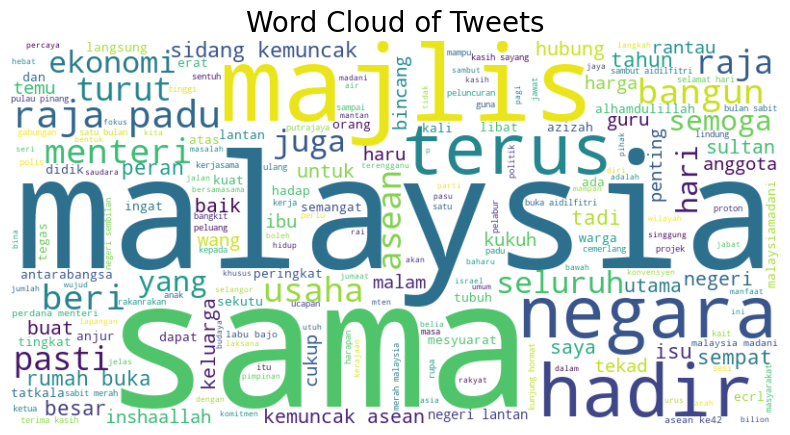

In [236]:
generate_wordcloud(aw_td,True)

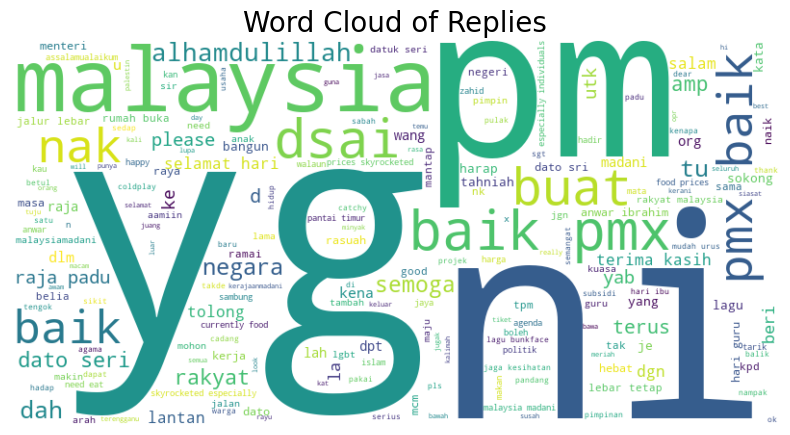

In [237]:
generate_wordcloud(aw_rd,False)

### 2. Sentiment Distribution

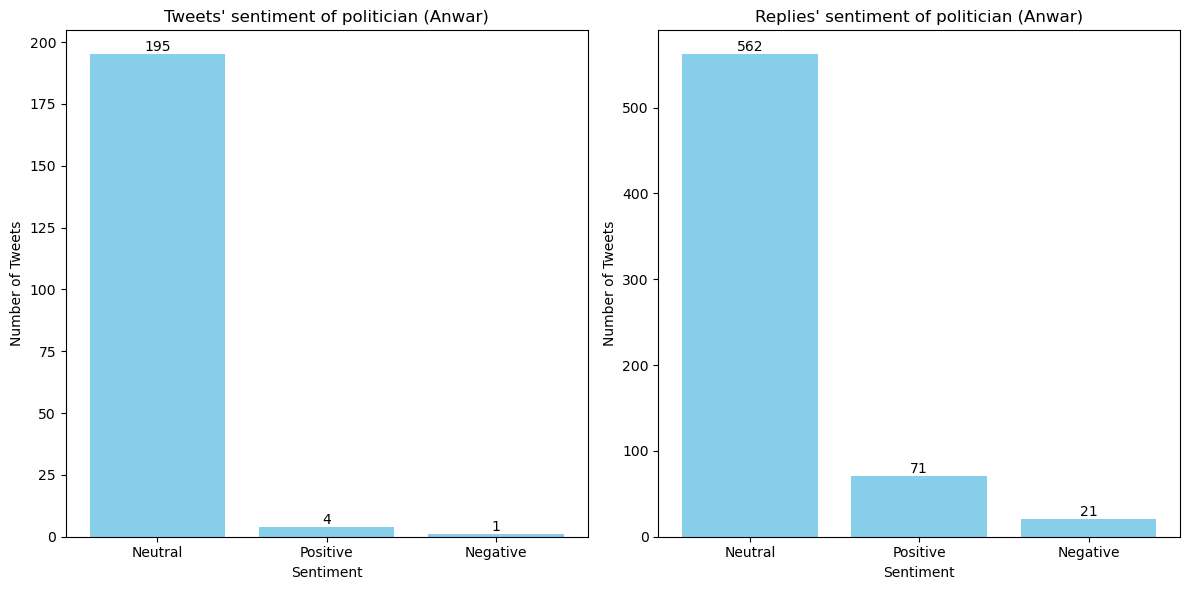

In [238]:
# Count the number of tweets for each sentiment
sentiment_counts_aw_td = aw_td['Sentiment'].value_counts()
sentiment_counts_aw_rd = aw_rd['Sentiment'].value_counts()

# bar plot 1 of tweets' sentiment of politician (anwar)
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))

bars1 = ax1.bar(sentiment_counts_aw_td.index, 
                sentiment_counts_aw_td.values,
                color='skyblue')
ax1.set_title("Tweets' sentiment of politician (Anwar)")
ax1.set_xlabel('Sentiment')
ax1.set_ylabel('Number of Tweets')

for bar in bars1:
    height = bar.get_height()
    ax1.text(
        bar.get_x() + bar.get_width() / 2, 
        height, 
        f'{int(height)}', 
        ha='center', 
        va='bottom'
    )

# bar plot 2 of follower replies' sentiment of politician (anwar)
bars2 = ax2.bar(sentiment_counts_aw_rd.index, 
                sentiment_counts_aw_rd.values,
                color='skyblue')
ax2.set_title("Replies' sentiment of politician (Anwar)")
ax2.set_xlabel('Sentiment')
ax2.set_ylabel('Number of Tweets')

for bar in bars2:
    height = bar.get_height()
    ax2.text(
        bar.get_x() + bar.get_width() / 2, 
        height, 
        f'{int(height)}', 
        ha='center', 
        va='bottom'
    )

plt.tight_layout()
plt.show()

Many of the tweets and replies fall as neutral, which lesser ratio of positive and negative sentiment. Despite of that, the positive sentiments in both cases are greater than negative one, indicate that the politican has been posting and also receiving more positive thoughts than negative thoughts.

In [239]:
aw_td['Date'] = pd.to_datetime(aw_td['Date']).dt.date

sentiment_by_day = aw_td.groupby(['Date', 'Sentiment']).size().reset_index(name='Count')
# uses pivot to reshape the dataframe, fill 0 in those sentiment value of NaN
sentiment_pivot = sentiment_by_day.pivot(index='Date', columns='Sentiment', values='Count').fillna(0)

sentiment_categories = ['Positive', 'Negative', 'Neutral']

fig = px.line(sentiment_pivot, x=sentiment_pivot.index, y=sentiment_categories,
              title='Sentiment Distribution Over Time of Politician',
              labels={'value': 'Count', 'Date': 'Date', 'variable': 'Sentiment'},
              color_discrete_map={'Positive': 'green', 'Negative': 'red', 'Neutral': 'blue'},
              template='plotly_white')

fig.update_layout(xaxis=dict(tickformat='%Y-%m-%d', tickmode='auto', nticks=10),
                  hovermode='x unified',
                  width=1000,
                  height=500)

fig.show()

During the period from May 5th to May 12th, there was a notable increase in neutral sentiment. This time frame also saw a rise in positive sentiment, particularly in tweets from politicians. Meanwhile, there was only one instance of negative sentiment observed during this period.

### 3. Engagement Analysis (Poltician's Tweets only)

In [240]:
print(aw_td['Engagement Rate'].describe())

count    200.000000
mean       0.047929
std        0.233922
min        0.002706
25%        0.005840
50%        0.008421
75%        0.033312
max        3.207340
Name: Engagement Rate, dtype: float64


- Correlation of Engagement to likes and retweet features

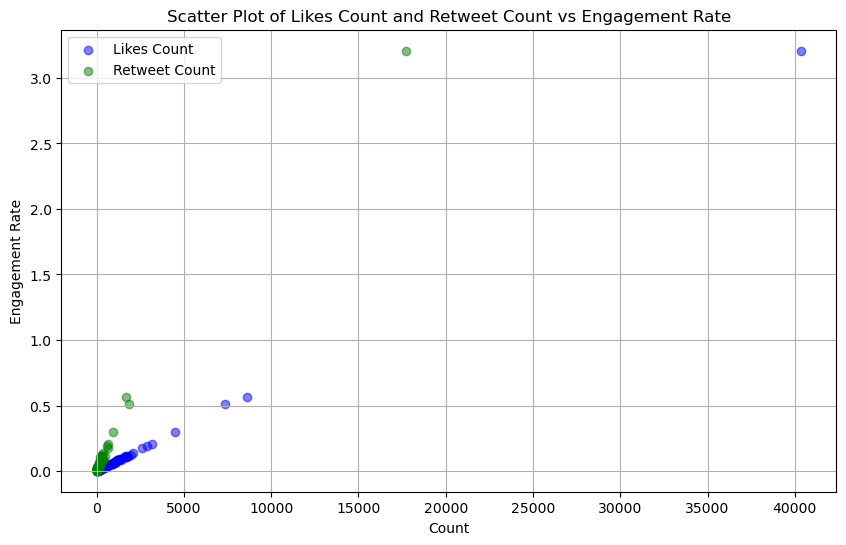

In [241]:
# Sample data (replace with your actual data)
likes_count = aw_td['Likes Count']
retweet_count = aw_td['Retweet Count']
engagement_rate = aw_td['Engagement Rate']

plt.figure(figsize=(10, 6))
plt.scatter(likes_count, engagement_rate, label='Likes Count', color='blue', alpha=0.5)
plt.scatter(retweet_count, engagement_rate, label='Retweet Count', color='green', alpha=0.5)

plt.title('Scatter Plot of Likes Count and Retweet Count vs Engagement Rate')
plt.xlabel('Count')
plt.ylabel('Engagement Rate')
plt.legend()
plt.grid(True)
plt.show()

Directly Proportional Relation of likes count and retweet count to engagement rate (higher the likes and retweet, higher the engagement rate)

- Histogram of Engagement Rate

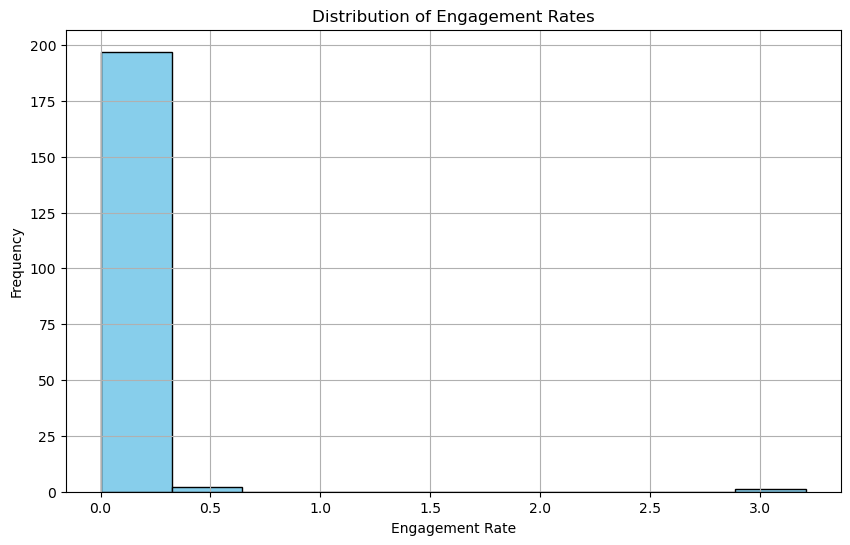

In [242]:
plt.figure(figsize=(10, 6))
plt.hist(aw_td['Engagement Rate'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Engagement Rates')
plt.xlabel('Engagement Rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Most of the engagement rate falls between to 0.0 to 0.25, indicating a low engagement rate. Hence, low engagement rate means lower likes and retweets count. Furthermore, the engagement rate of 3.0 might be an outliar.

- Engagement rate over time

In [282]:
aw_td

,Tweet ID,Tweet Text,words_count,Date,Likes Count,Retweet Count,Hashtag/s,Sentiment,Engagement Rate
0,1658423912026500096,"[turut, ulang, nyata, negaramampu, bangun, ger...",10,2023-05-16,63,16,NaN,Neutral,0.004362
1,1658423904388679936,"[justeru, sumbangan, anggota, keselamatanterma...",10,2023-05-16,61,16,NaN,Neutral,0.004252
2,1658423897413530112,"[tegaskan, tugas, anggota, selamat, pasti, ama...",10,2023-05-16,48,15,NaN,Neutral,0.003479
3,1658423890077700096,"[hadir, ketua, menteri, melaka, datuk, seri, a...",16,2023-05-16,48,16,NaN,Neutral,0.003534
4,1658423881835889920,"[hadir, sambut, aidilfitri, padu, madanimasyar...",13,2023-05-16,540,99,NaN,Neutral,0.035286
...,...,...,...,...,...,...,...,...,...
195,1653931740464019968,"[hari, wesak, hari, besar, buat, sahabatsahaba...",13,2023-05-04,1067,165,NaN,Neutral,0.068032
196,1653648017130680064,"[raja, padu, ulang, komitmen, tekad, jelas, hi...",13,2023-05-03,720,198,NaN,Neutral,0.050693
197,1653356488793139968,"[moga, lawatan, erat, hubung, beri, manfaat, k...",8,2023-05-02,134,24,NaN,Neutral,0.008725
198,1653356483483140096,"[itu, beliau, tugas, setiausaha, politik, pent...",14,2023-05-02,138,23,NaN,Positive,0.008891


In [243]:
import plotly.graph_objects as go

# Create a plotly figure
fig = go.Figure()

# Add trace
fig.add_trace(go.Scatter(x=aw_td['Date'], y=aw_td['Engagement Rate'],
                         mode='markers', name='Engagement Rate',
                         line=dict(color='blue'), marker=dict(size=8)))

fig.update_layout(
    title='Engagement Rate Over Time',
    xaxis_title='Date',
    yaxis_title='Engagement Rate',
    xaxis=dict(tickformat='%Y-%m-%d', tickmode='auto', nticks=20),
    template='plotly_white',
    width=1000,
    height=500
)

fig.show()


During the period from May 5th to May 12th, there was a noticeable increase in the politician’s tweeting activity which had discuss previously. This period stands out not just for the incresed number of tweets but also for the increased interaction from the public with the evidence of the engagements from that period.

- Mean Engagement Rate based on sentiment

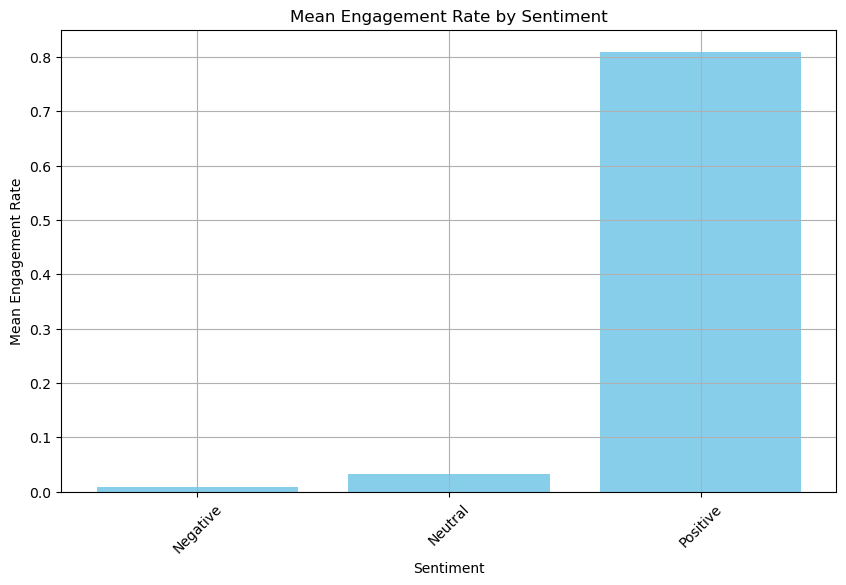

In [244]:
sentiment_groups = aw_td.groupby('Sentiment')['Engagement Rate'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(sentiment_groups['Sentiment'], sentiment_groups['Engagement Rate'], color='skyblue')
plt.title('Mean Engagement Rate by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Mean Engagement Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

During the analyzed period, positive sentiment posts consistently achieved higher engagement rates compared to neutral sentiment posts. While neutral sentiment posts were the most frequent, they fall significantly behind in terms of engagement rate compared to positive sentiment posts. This observation suggests that positive sentiment posts are more likely to attract followers and encourage interaction, leading to more likes and retweets count.

- Manual Inspection on dataframe

The analysis of engagement rates across different tweet sentiments revealed a fascinating trend. Even though positive tweets are less common, they tend to receive significantly higher engagement rates. This might suggest the outliar detected previosuly will probably be in postive sentiment's tweet.

In [245]:
aw_td.head()

,Tweet ID,Tweet Text,words_count,Date,Likes Count,Retweet Count,Hashtag/s,Sentiment,Engagement Rate
0,1658423912026500096,"[turut, ulang, nyata, negaramampu, bangun, ger...",10,2023-05-16,63,16,NaN,Neutral,0.004362
1,1658423904388679936,"[justeru, sumbangan, anggota, keselamatanterma...",10,2023-05-16,61,16,NaN,Neutral,0.004252
2,1658423897413530112,"[tegaskan, tugas, anggota, selamat, pasti, ama...",10,2023-05-16,48,15,NaN,Neutral,0.003479
3,1658423890077700096,"[hadir, ketua, menteri, melaka, datuk, seri, a...",16,2023-05-16,48,16,NaN,Neutral,0.003534
4,1658423881835889920,"[hadir, sambut, aidilfitri, padu, madanimasyar...",13,2023-05-16,540,99,NaN,Neutral,0.035286


In [246]:
# why the date 2023-05-09 had more engagement rate for the politician

aw_td['Date'] = pd.to_datetime(aw_td['Date'])
aw_td[aw_td['Date'] == '2023-05-09']

,Tweet ID,Tweet Text,words_count,Date,Likes Count,Retweet Count,Hashtag/s,Sentiment,Engagement Rate
129,1655971176634779904,"[see, in, november]",3,2023-05-09,7380,1860,NaN,Neutral,0.510241
130,1655906852188849920,"[moga, keluarga, asean, terus, harmoni, tenter...",8,2023-05-09,176,35,NaN,Neutral,0.011652
131,1655906847898099968,"[pak, jokowi, nada, dan, sepakat, kukuh, hubun...",14,2023-05-09,194,33,NaN,Neutral,0.012535
132,1655906843682830080,"[temu, turut, hadir, menteri, luar, delegasi, ...",12,2023-05-09,127,25,NaN,Neutral,0.008394
133,1655906839303950080,"[usai, tiba, lapangan, terbang, antarabangsa, ...",13,2023-05-09,1768,272,NaN,Neutral,0.112651
134,1655805719701250048,"[inshaallah, malaysia, akan, usaha, kukuh, hub...",10,2023-05-09,309,38,NaN,Neutral,0.019162
135,1655805715674690048,"[malaysia, tekad, utuh, terus, main, peran, si...",12,2023-05-09,316,34,NaN,Neutral,0.019327
136,1655805709492290048,"[hari, saya, delegasi, lepas, labu, bajo, indo...",12,2023-05-09,1789,248,NaN,Neutral,0.112485
137,1655786927000539904,"[kasih, kuat, orang, isteri, ibu, semarak, obo...",8,2023-05-09,8591,1706,NaN,Neutral,0.568609
138,1655765701901309952,"[welcome, kuala, lumpur]",3,2023-05-09,40362,17720,NaN,Positive,3.207340


Found out that the highest engagement rate (outliar) is a positive sentiment

In [247]:
aw_td[aw_td['Sentiment'] == 'Positive']

,Tweet ID,Tweet Text,words_count,Date,Likes Count,Retweet Count,Hashtag/s,Sentiment,Engagement Rate
138,1655765701901309952,"[welcome, kuala, lumpur]",3,2023-05-09,40362,17720,NaN,Positive,3.207340
145,1655459598344780032,"[kerajaan, ambil, putus, tidak, popular, saat,...",12,2023-05-08,144,30,NaN,Positive,0.009608
172,1654760668674010112,"[majlis, sama, turut, umum, tambah, untuk, cep...",11,2023-05-06,206,36,NaN,Positive,0.013363
198,1653356483483140096,"[itu, beliau, tugas, setiausaha, politik, pent...",14,2023-05-02,138,23,NaN,Positive,0.008891


This filtered dataframe suggests that even with tweets categorized as having positive sentiment, the engagement rate remains low. **This implies that factors other than sentiment alone influence engagement rates in tweets.**

Based on available online information, the highest engagement rate observed on May 9, 2023, was related to Datuk Seri Anwar Ibrahim welcoming Coldplay to Malaysia. This suggests that posts welcoming celebrities to the country tend to attract higher engagement from followers.

- Remove Outliars (Pre-process)

In [248]:
aw_td = aw_td[aw_td['Tweet ID'] != 1655765701901309952]

In [249]:
aw_td[aw_td['Sentiment'] == 'Positive']

,Tweet ID,Tweet Text,words_count,Date,Likes Count,Retweet Count,Hashtag/s,Sentiment,Engagement Rate
145,1655459598344780032,"[kerajaan, ambil, putus, tidak, popular, saat,...",12,2023-05-08,144,30,NaN,Positive,0.009608
172,1654760668674010112,"[majlis, sama, turut, umum, tambah, untuk, cep...",11,2023-05-06,206,36,NaN,Positive,0.013363
198,1653356483483140096,"[itu, beliau, tugas, setiausaha, politik, pent...",14,2023-05-02,138,23,NaN,Positive,0.008891


- Correlation of Engagement Rate and Sentiment after removing outliar

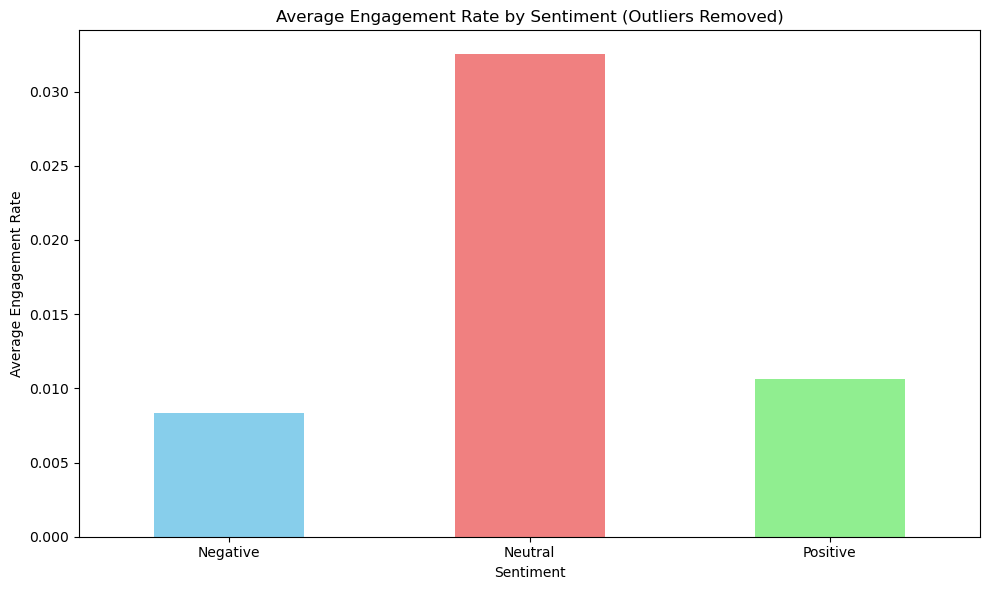

In [289]:
mean_engagement_rate = aw_td.groupby('Sentiment')['Engagement Rate'].mean()

plt.figure(figsize=(10, 6))
mean_engagement_rate.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])

plt.xlabel('Sentiment')
plt.ylabel('Average Engagement Rate')
plt.title('Average Engagement Rate by Sentiment (Outliers Removed)')
plt.xticks(rotation=0)

# Displaying the plot
plt.tight_layout()
plt.show()

After removing outliers, the analysis shows that tweets classified as neutral have higher average engagement rates compared to both negative and positive tweets. This suggests that the overall engagement with tweets does not heavily depend on the sentiment expressed. Instead, the volume and consistency of posting appear to be more significant in driving engagement. Therefore, for a politician aiming to increase their public profile and connect with the audience, maintaining a regular posting schedule, regardless of the sentiment, is likely a more effective strategy.

### 4. Word Count Analysis

In [250]:
from collections import Counter

def visualize_top_word_count_with_sentiment(df):
    sentiment_groups = df.groupby('Sentiment')['Tweet Text'].sum()

    top_words_by_sentiment = {}
    for sentiment, tweet_texts in sentiment_groups.items():
        word_counts = Counter(tweet_texts)
        top_words = word_counts.most_common(10) 
        top_words_by_sentiment[sentiment] = top_words

    # Prepare data for plotting
    sentiments = list(top_words_by_sentiment.keys())

    plt.figure(figsize=(15, 8))

    # Plotting each sentiment's top words
    for idx, sentiment in enumerate(sentiments, start=1):
        plt.subplot(1, len(sentiments), idx)
        top_words = [word[0] for word in top_words_by_sentiment[sentiment]]
        counts = [word[1] for word in top_words_by_sentiment[sentiment]]
        plt.barh(top_words, counts, color='skyblue')
        plt.xlabel('Word Count')
        plt.ylabel('Top Words')
        plt.title(f'Top 10 Words for {sentiment}')
        plt.gca().invert_yaxis()  # Invert y-axis to show most common words at the top

    plt.tight_layout()
    plt.show()

- Word Count for Politician Tweets

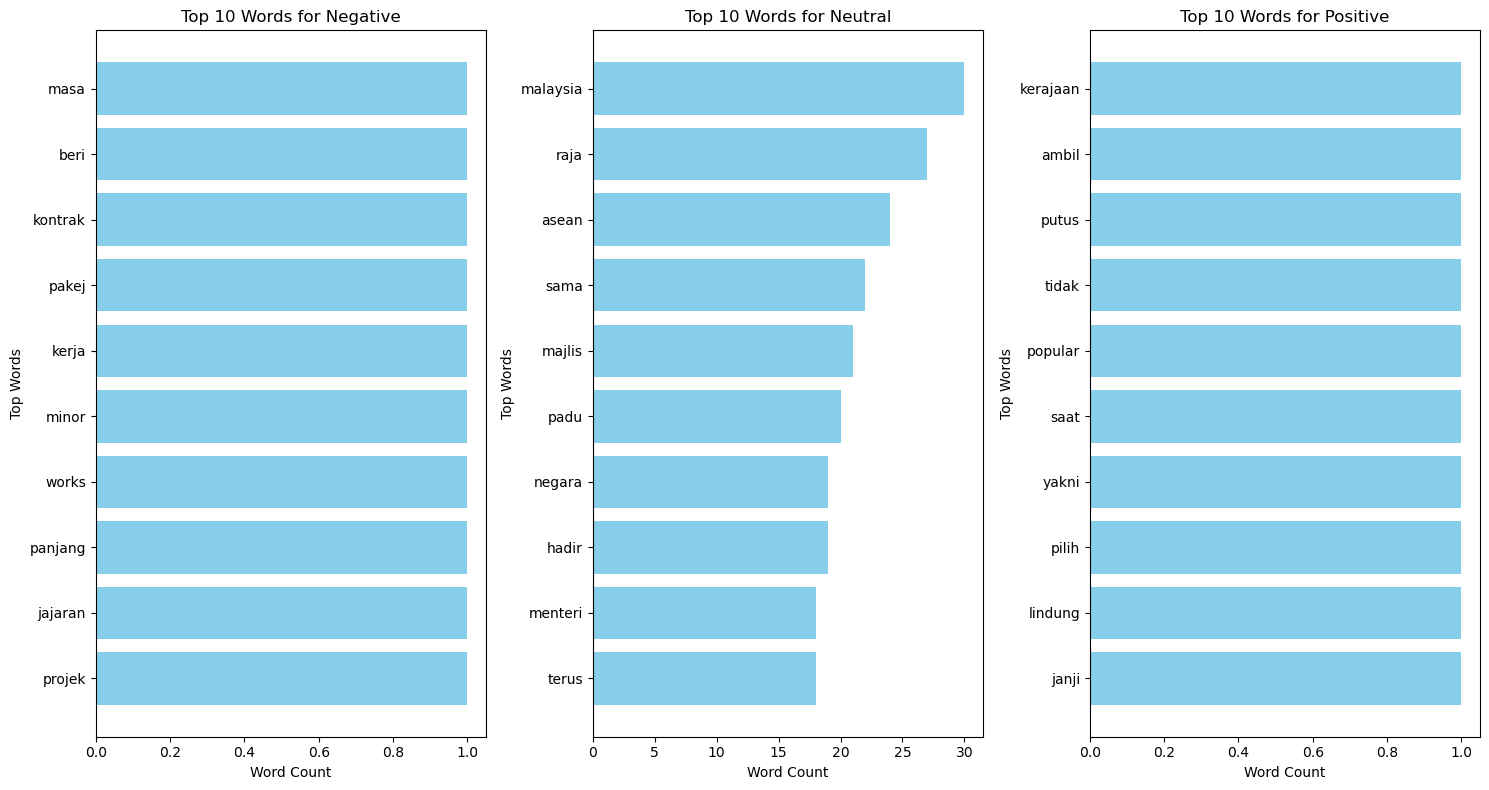

In [251]:
visualize_top_word_count_with_sentiment(aw_td)

- Word Counts for Mentions of Politician

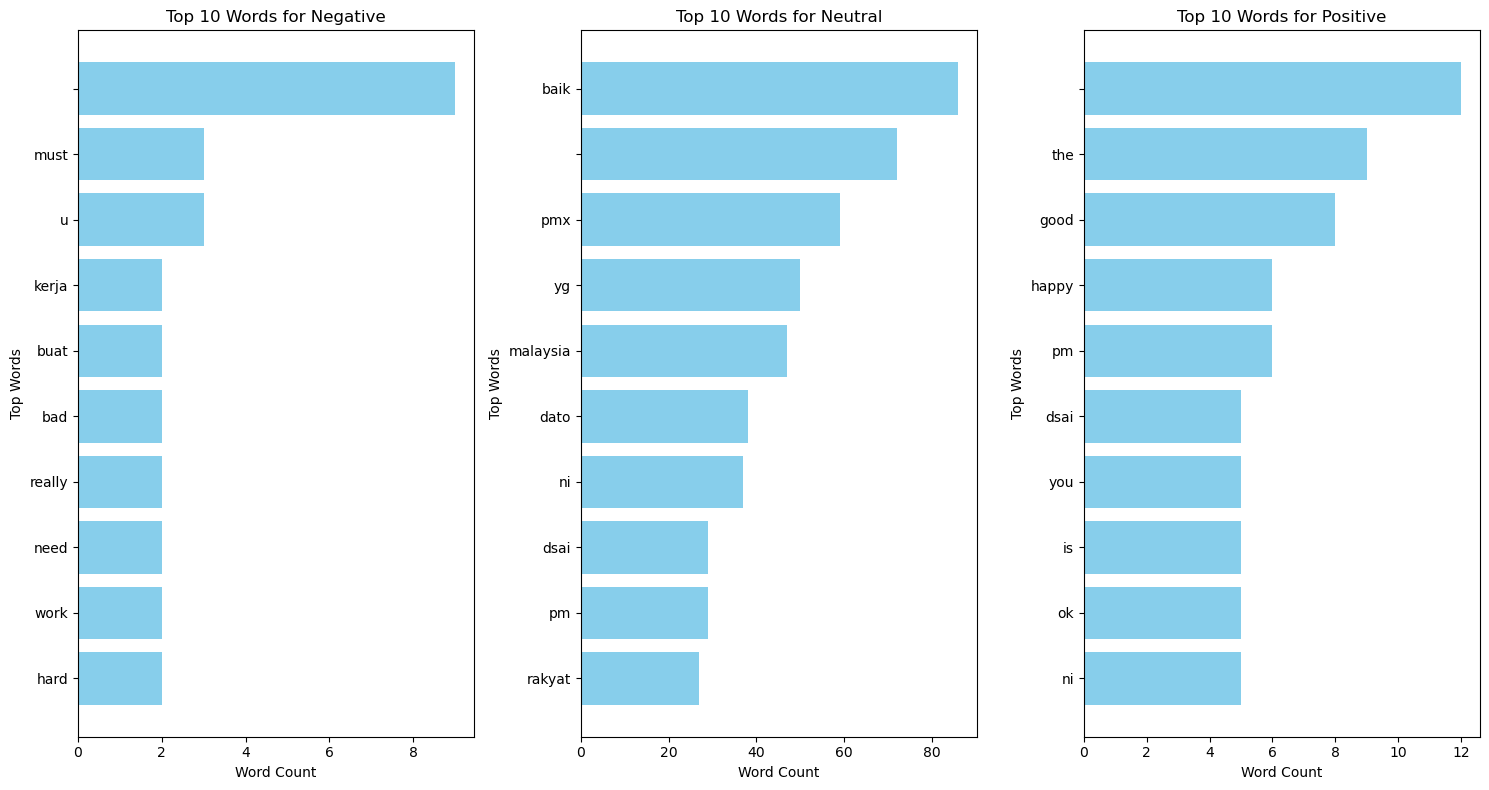

In [252]:
visualize_top_word_count_with_sentiment(aw_rd)

In [253]:
count_empty = sum(1 for lst in aw_rd['Tweet Text'] for word in lst if word == '')
print(count_empty)

93


In [254]:
# slight data cleaning for empty word
def remove_empty_word(lst):
    return [word for word in lst if word != '']

aw_rd['Tweet Text'] = aw_rd['Tweet Text'].apply(remove_empty_word)

count_empty = sum(1 for lst in aw_rd['Tweet Text'] for word in lst if word == '')
print(f"Empty words count after cleaning: {count_empty}")

Empty words count after cleaning: 0


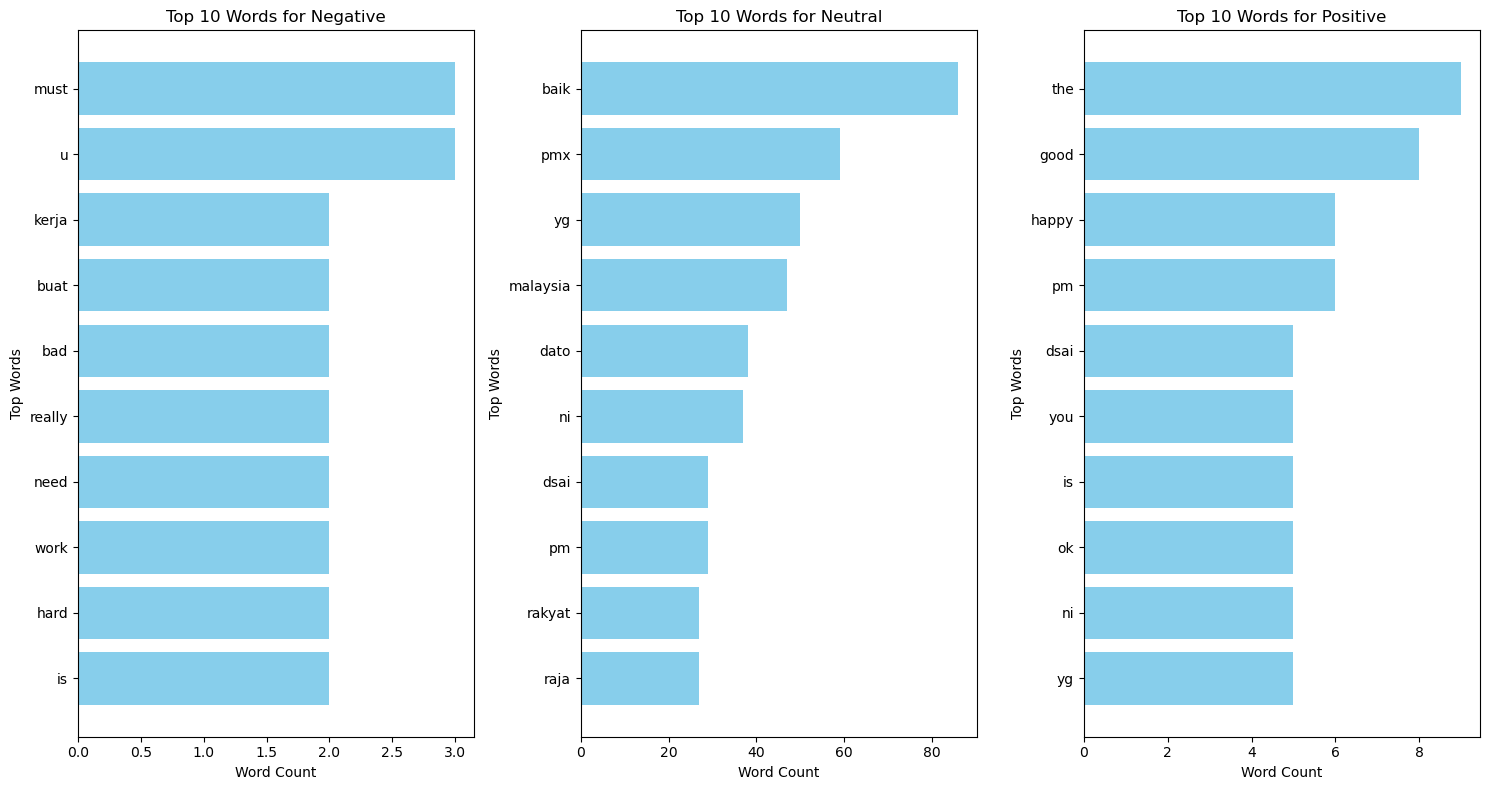

In [255]:
visualize_top_word_count_with_sentiment(aw_rd)

Word count analysis may be limited in this context due to the presence of numerous stopwords that haven't been removed yet in Malay language texts.

### 5. Hashtag Analysis

In [273]:
aw_td.head()

,Tweet ID,Tweet Text,words_count,Date,Likes Count,Retweet Count,Hashtag/s,Sentiment,Engagement Rate
0,1658423912026500096,"[turut, ulang, nyata, negaramampu, bangun, ger...",10,2023-05-16,63,16,NaN,Neutral,0.004362
1,1658423904388679936,"[justeru, sumbangan, anggota, keselamatanterma...",10,2023-05-16,61,16,NaN,Neutral,0.004252
2,1658423897413530112,"[tegaskan, tugas, anggota, selamat, pasti, ama...",10,2023-05-16,48,15,NaN,Neutral,0.003479
3,1658423890077700096,"[hadir, ketua, menteri, melaka, datuk, seri, a...",16,2023-05-16,48,16,NaN,Neutral,0.003534
4,1658423881835889920,"[hadir, sambut, aidilfitri, padu, madanimasyar...",13,2023-05-16,540,99,NaN,Neutral,0.035286


In [275]:
aw_td[aw_td['Hashtag/s'].notnull()]

,Tweet ID,Tweet Text,words_count,Date,Likes Count,Retweet Count,Hashtag/s,Sentiment,Engagement Rate
29,1658000348110520064,"[hadir, majlis, himpun, bulanan, sama, warga, ...",12,2023-05-15,605,130,MalaysiaMADANI,Neutral,0.040587
45,1657676724430309888,"[dengar, muzik, video, rasmi, raja, padu, taju...",9,2023-05-14,1616,497,"KerajaanPerpaduan,MalaysiaMADANI",Neutral,0.116682
49,1657597660453540096,"[selamat, hari, ibu, semua, ibuibu, kepada, al...",11,2023-05-14,1599,305,MalaysiaMADANI,Neutral,0.105141
128,1656132921076620032,"[rt, , eksklusif, pm, malaysia, anwar, ibrahim...",14,2023-05-10,0,49,TempoDunia,Neutral,0.002706
154,1655400586014230016,"[malam, mempengerusikan, mesyuarat, majlis, ru...",10,2023-05-08,986,173,MalaysiaMADANI,Neutral,0.064001
166,1655162029672640000,"[hadir, majlis, rumah, buka, aidilfitri, mubar...",13,2023-05-07,1174,219,MalaysiaMADANI,Neutral,0.076923


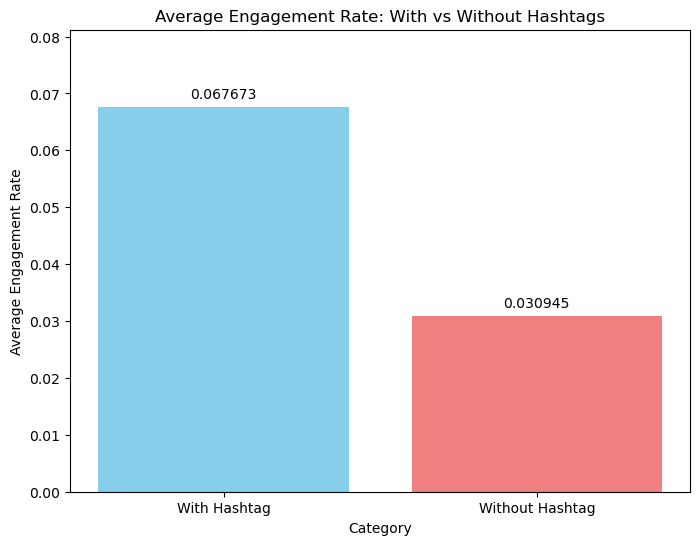

In [280]:
# include only rows with hashtag

hashtag_present = aw_td[~aw_td['Hashtag/s'].isnull()]

engagement_rate_with_hashtag = hashtag_present['Engagement Rate'].mean()
engagement_rate_without_hashtag = aw_td[aw_td['Hashtag/s'].isnull()]['Engagement Rate'].mean()

categories = ['With Hashtag', 'Without Hashtag']
engagement_rates = [engagement_rate_with_hashtag, engagement_rate_without_hashtag]

plt.figure(figsize=(8, 6))
plt.bar(categories, engagement_rates, color=['skyblue', 'lightcoral'])
plt.xlabel('Category')
plt.ylabel('Average Engagement Rate')
plt.title('Average Engagement Rate: With vs Without Hashtags')
plt.ylim(0, max(engagement_rates) * 1.2)  # Adding some padding to the top of the y-axis

# Display values on top of the bars
for i, rate in enumerate(engagement_rates):
    plt.text(i, rate + 0.001, f'{rate:.6f}', ha='center', va='bottom')

plt.show()

Based on the observation from the analysis, including hashtags in tweets appears to positively impact engagement rates. 